# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

### Spectrogram of Sine waves:
A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the colour or brightness. A sine wave consists of a single frequency only, and its spectrum is a single point. Theoretically, a sine wave exists over infinite time and never changes. The objective of this experiment is to visualize the various spectrograms of sine waves of different frequencies and also combination different sine waves.

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "aiml_pg_25" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "4521452411" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "U2W8_CS_Spectrogram_Sine_Waves" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx pip install playsound")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


###Importing required packages

In [4]:
import librosa
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

###Defining the sine waves with frequencies f = 40k, f = 30k, f = 20k and the combination of these waves

In [5]:
fs = 1e6
N = 1e5
amp = 2 * np.sqrt(2)
print(amp)
time = np.arange(N) / float(fs)
print(time)
#mod = 500*np.cos(2*np.pi*0.25*time)
carrier1 = amp * np.sin(2*np.pi*40e3*time)
carrier2 = amp * np.sin(2*np.pi*30e3*time)
carrier3 = amp * np.sin(2*np.pi*20e3*time)
x = carrier1 + carrier2 + carrier3

2.8284271247461903
[0.0000e+00 1.0000e-06 2.0000e-06 ... 9.9997e-02 9.9998e-02 9.9999e-02]


###Defining a function to plot spectrograms of the respective sine waves

In [6]:
def plot_sin(time, t, amp, sf, f, spgm=False):
    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    plt.plot(time[:t],amp[:t])
    name = 'sine_wave_'+str(f)+'.png'
    plt.savefig(name)
    plt.show()
    if spgm:
        # This is executed only if spectrogram (spgm) is given True
        name = 'spectrogram_'+str(f)+'.png'
        plt.ylim([0,50000])
        fs, ts, Sxx = signal.spectrogram(amp, sf)
        #frequency values (fs), time values (ts), and the spectrogram matrix (Sxx).
        print(Sxx)
        print(Sxx.shape)
        # print()
        # print(fs, ts)
        # pp
        plt.pcolormesh(ts, fs, Sxx, cmap = 'viridis') #This line creates a pseudocolor plot of the spectrogram using ts as the x-axis, fs as the y-axis, and Sxx as the color intensity values. The cmap='viridis' argument sets the colormap to be used.
        name = 'Spectrogram_'+str(f)+'.png'
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.savefig(name)
        plt.colorbar()
    plt.show()

###Plotting the sine waves and their respective spectrograms

From the below plots, we can observe that any wave is a combination of many sine waves

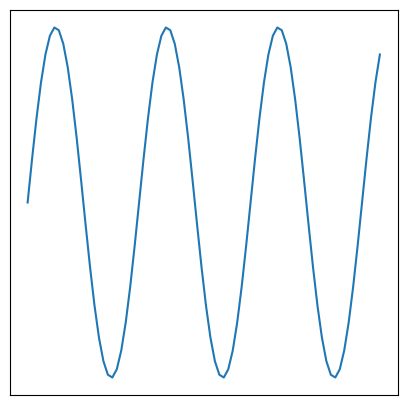

[[2.76178120e-07 1.07560546e-07 1.20548922e-08 ... 3.80261656e-07
  5.76968194e-07 7.30661473e-07]
 [9.49486771e-09 7.59091627e-09 6.97181874e-09 ... 1.40775452e-08
  1.66496372e-08 1.82655767e-08]
 [3.93395461e-08 5.07287172e-08 5.84047243e-08 ... 4.13980602e-08
  2.90478059e-08 1.83479554e-08]
 ...
 [4.29974985e-16 3.54595211e-16 3.00471842e-16 ... 3.91725498e-16
  4.70930147e-16 5.42611160e-16]
 [1.31517601e-16 1.88053419e-16 2.28750593e-16 ... 1.60976078e-16
  1.01651241e-16 4.78625107e-17]
 [1.06292472e-17 5.26436391e-18 1.40285280e-18 ... 7.83670338e-18
  1.34665217e-17 1.85706422e-17]]
(129, 446)


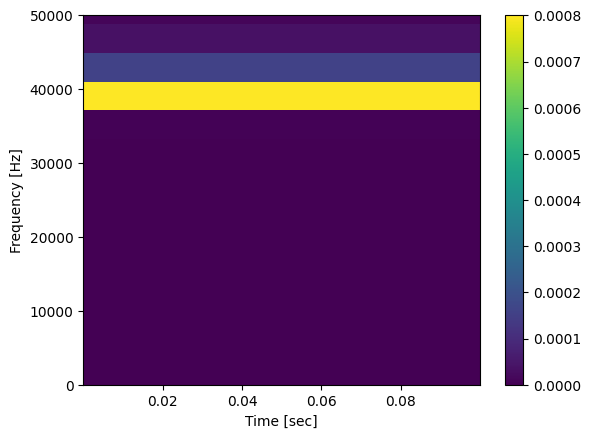

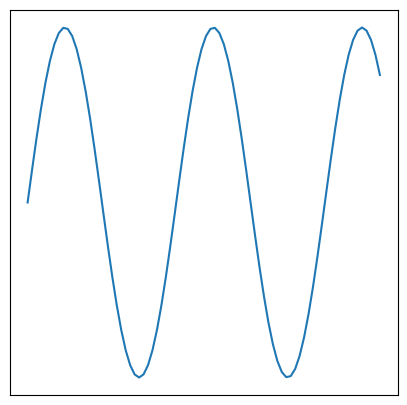

[[3.37361472e-06 4.03736165e-07 4.30506603e-06 ... 4.10888476e-06
  1.44675268e-08 4.29366164e-06]
 [1.06910187e-07 3.33384790e-08 1.52696122e-07 ... 1.40713521e-07
  9.56225025e-09 1.63105945e-07]
 [1.98007652e-09 6.18758605e-09 1.29601395e-09 ... 1.37463049e-09
  6.34357929e-09 1.61138229e-09]
 ...
 [1.02929967e-15 9.21265062e-16 1.07537544e-15 ... 1.06441524e-15
  8.99517518e-16 1.08070081e-15]
 [1.50872370e-15 6.67964109e-16 1.87517099e-15 ... 1.78740632e-15
  4.93819181e-16 1.92031952e-15]
 [8.17491277e-16 1.55399776e-16 1.10646539e-15 ... 1.03722607e-15
  1.80133008e-17 1.14220790e-15]]
(129, 446)


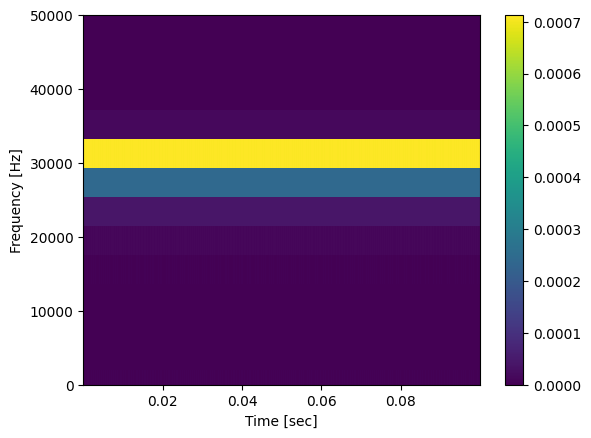

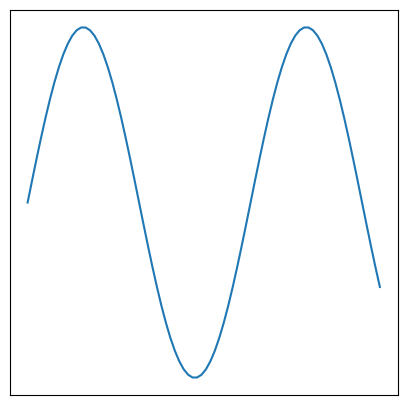

[[1.11430081e-06 4.78888711e-07 1.00817488e-07 ... 8.16200988e-06
  7.34346628e-06 6.35093691e-06]
 [1.98626825e-06 1.53688128e-06 1.25202092e-06 ... 6.60594126e-06
  6.09605810e-06 5.46423170e-06]
 [3.91211024e-06 3.66928336e-06 3.51428972e-06 ... 6.38604574e-06
  6.11475185e-06 5.77763342e-06]
 ...
 [4.20469172e-16 4.37116483e-16 4.47561024e-16 ... 2.47082257e-16
  2.66397062e-16 2.90236054e-16]
 [2.55435662e-16 2.51671969e-16 2.49322330e-16 ... 2.94880000e-16
  2.90466994e-16 2.85030402e-16]
 [2.10619365e-17 9.61224833e-18 2.44141280e-18 ... 1.40579309e-16
  1.27244762e-16 1.10797777e-16]]
(129, 446)


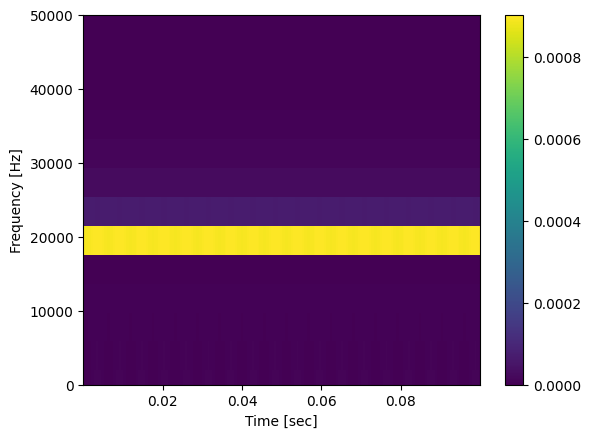

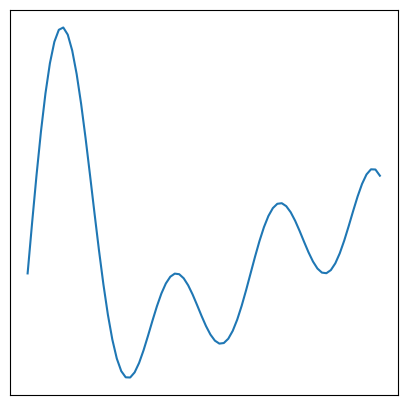

[[1.16818438e-05 7.36301468e-08 2.71443034e-06 ... 4.54675166e-08
  1.28862931e-05 1.39684159e-05]
 [2.60931348e-06 1.12488749e-06 1.34290041e-06 ... 5.33084930e-06
  5.91204534e-06 8.21711201e-06]
 [4.93008776e-06 3.04152531e-06 4.39653403e-06 ... 6.25660656e-06
  6.26743324e-06 5.78493893e-06]
 ...
 [2.57788340e-15 4.60616470e-16 7.02914613e-16 ... 9.92193361e-16
  3.78169511e-15 5.81495367e-16]
 [2.08392683e-15 2.42272339e-16 1.65522816e-15 ... 7.05007520e-16
  1.97850519e-15 3.20129085e-15]
 [8.95259077e-16 5.00013304e-17 1.08145567e-15 ... 3.08001394e-16
  1.40536614e-16 2.36507001e-15]]
(129, 446)


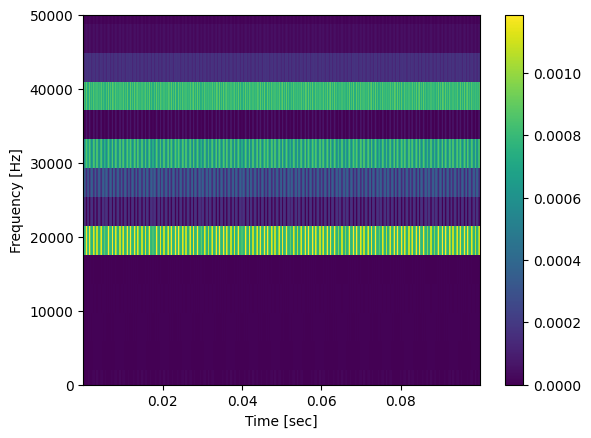

In [7]:
t = np.where(time<0.00008)[0].shape[0]
# print(t)
plot_sin(time,t,carrier1,fs, 40000, spgm=True)
plot_sin(time,t,carrier2,fs, 30000, spgm=True)
plot_sin(time,t,carrier3,fs, 20000, spgm=True)
plot_sin(time,t,x,fs, 123,spgm=True)

## Please answer the questions below to complete the experiment:

In [8]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [9]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "sdgfdjhfgjfhjh" #@param {type:"string"}

In [10]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]

In [11]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [12]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5661
Date of submission:  26 Jun 2025
Time of submission:  03:08:41
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
